## Python绘制热力图查看两个分类变量之间的强度分布

### 热力图(heat map)

热力图（或者色块图），由小色块组成的二维图表，其中：
* x、y轴可以是分类变量，对应的小方块由连续数值表示颜色强度
* 即用两个分类字段确定数值点的位置，用于展示数据的分布情况

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

### 实例1：模拟绘制北京景区热度图

In [2]:
df = pd.DataFrame(
    np.random.rand(4, 7), 
    index = ["天安门", "故宫", "奥林匹克森林公园", "八达岭长城"],
    columns = ["周一", "周二", "周三", "周四", "周五", "周六", "周日"]
)
df

,周一,周二,周三,周四,周五,周六,周日
天安门,0.539911,0.023115,0.004172,0.464810,0.793811,0.450395,0.432278
故宫,0.960393,0.445891,0.694777,0.832206,0.451283,0.344077,0.628598
奥林匹克森林公园,0.924382,0.157985,0.016790,0.761218,0.627771,0.893132,0.327341
八达岭长城,0.381288,0.823740,0.515953,0.259173,0.672290,0.641446,0.299764


<Axes: >

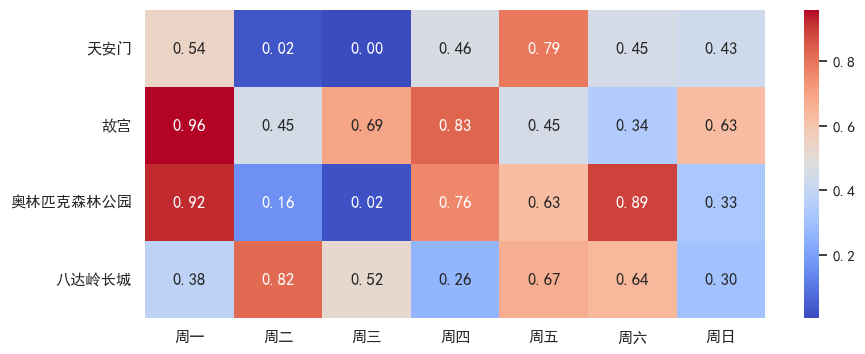

In [3]:
plt.figure(figsize=(10, 4))
sns.heatmap(df, annot=True, fmt = ".2f", cmap = "coolwarm")

### 实例2：绘制泰坦尼克事件与存亡变量的关系

In [4]:
# 读取并合并泰坦尼克数据
df = pd.concat(
    [
        pd.read_csv("./datas/titanic/titanic_train.csv"),
        pd.read_csv("./datas/titanic/titanic_test.csv")
    ]
)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
# pands把字符串类型的列，变成分类数字编码
for field in ["Sex", "Cabin", "Embarked"]:
    df[field] = df[field].astype("category").cat.codes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int8   
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   int16  
 11  Embarked     1309 non-null   int8   
dtypes: float64(3), int16(1), int64(4), int8(2), object(2)
memory usage: 107.4+ KB


In [11]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,-1,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,106,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,-1,2


In [12]:
# 计算不同变量之间两两相关系数
df.corr()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

d:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


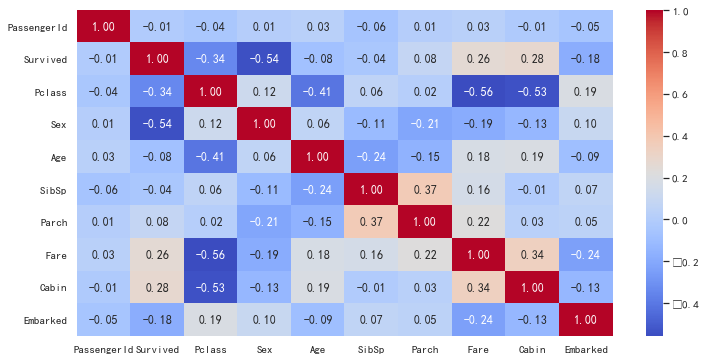

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt = ".2f", cmap = "coolwarm")